## Assignment 2
Topic: Energy Use in GB Domestic Buildings 2021
<br>Data Source: [SERL](https://serl.ac.uk/)
<br>File Name: serl statistics.csv
<br>Group Number: 11
<br>Name: Liuyang Chen, ID: s2461377

### Contents
**1 Introduction**<br> 
[1.1 Load and Overview of the Dataset](#1.1)<br> 
[1.2 Check the Content of the Dataset](#1.2) <br>
[1.3 Check the strange things](#1.3)<br>
[1.4 Summary of this chapter](#1.4)<br>
**2 Exploratory Questions**<br> 
[2.1 Question 1](#2.1)<br> 
[2.2 Question 2](#2.2) <br>
[2.3 Question 3](#2.3) <br>
**3 Reflect and Hypothesis**<br> 
[3.1 Hypothesis](#3.1)<br> 
[3.2 Reflect](#3.2) <br>

## 1 Introduction

Hi there, let me briefly introduce this dataset (๑•̀ㅂ•́)و✧. 
We will also introduce and discuss some information about it using Python in later chapters.

The Smart Energy Research Lab(SERL) is an organisation that provides a secure, consistent, and trusted channel for 
researchers to access high-resolution energy data. SERL establishes an obeservatory panel to collect the data from over **13,000** smart metered households across Britainm. The dataset is based on an aggregated energy consumption statistics from the SERL 4th Edition **for 2021 and 2020**<sup>[1]</sup>. The general type of the data is a **'csv'** file.<br>

From the **data owner**, the data can help us know the energy consumption situation in GB better, guide people to pay attention to daily energy consumption, which may have a positive effect on the sustainaility. Before our project, the data owner has already an initial exploration of some of the unclassified variables was made and we need do more detailed analysis and data visualisation on such basis.
> [1]: Jessica Few, Eoghan McKenna, Martin Pullinger (2022) Smart Energy Research Lab: Energy Use in GB domestic buildings 2021

### 1.1 
### Load and Overview of the Dataset

Load necessary modules and dataset

In [1]:
#load necessary modules: pandas,numpy, seaborn, matplotlib
import pandas as pd  #abbreviation: pd
import numpy as np   #abbreviation: np
import seaborn as sns   #abbreviation: sns
import matplotlib.pyplot as plt   #abbreviation: plt
#load the project dataset, store it in a new dataset, use'low_memory=False' to make sure the types are not confused
data = pd.read_csv("serl statistics.csv", low_memory=False)  #variable name: data; 

Firstly, we need to have a basic understanding of the contents of the dataset, included but not limited to the following.
- The shape of the dataset
- The meaning of each column, if there are strange things
- How the data can be divided
- Are there some strange things in the data we need to check

In [2]:
#check basic data information
print('the dataset shape is:\n',data.shape,'\n'*2)
print('the data type of each column is:\n',data.dtypes)

the dataset shape is:
 (109990, 21) 


the data type of each column is:
 fuel                        object
unit                        object
summary_stat                object
subsample                   object
summary_time                object
time_period                 object
segmentation_variable_1     object
segment_1_value             object
value                      float64
n_sample                   float64
n_statistic                float64
mean_temp                  float64
mean_hdd                   float64
decimal_places             float64
weekday_weekend             object
mean_floor_area            float64
n_mean_floor_area          float64
mean_bedrooms              float64
n_mean_bedrooms            float64
mean_occupants             float64
n_mean_occupants           float64
dtype: object


From above, we can know the dataset consists of 109990 rows and 21 columns. ( (°ー°〃) really surprised to have such a large amount of data   (°ー°〃) )

[Back to Contents](#Contents)

### 1.2 
### Check the Content of the Dataset

#### 1.2.1 'Object Type' Columns

We can know that the data types of some columns are 'object', while others are 'float'
I prepare to use 'unique()' to know the content of each 'object type' column, use 'unique()' to know some information about the 'float' column.

In [3]:
#use 'unique()' to know the content of each 'object type' column
for col_name in data.columns:
    if data.loc[:,col_name].dtypes == object:
        print(col_name, 'consists of',data[col_name].unique(),'\n')

fuel consists of ['Net Electricity' 'Gas'] 

unit consists of ['kWh' 'Wh'] 

summary_stat consists of ['mean' 'standard deviation' 'median' '75th percentile' '25th percentile'] 

subsample consists of ['all' 'participants with annual data for 2021 and 2020'] 

summary_time consists of ['2021' 'heating_season_2020_2021' 'Jan-21' 'Feb-21' 'Mar-21' 'Apr-21'
 'May-21' 'Jun-21' 'Jul-21' 'Aug-21' 'Sep-21' 'Oct-21' 'Nov-21' 'Dec-21'
 '00:30' '01:00' '01:30' '02:00' '02:30' '03:00' '03:30' '04:00' '04:30'
 '05:00' '05:30' '06:00' '06:30' '07:00' '07:30' '08:00' '08:30' '09:00'
 '09:30' '10:00' '10:30' '11:00' '11:30' '12:00' '12:30' '13:00' '13:30'
 '14:00' '14:30' '15:00' '15:30' '16:00' '16:30' '17:00' '17:30' '18:00'
 '18:30' '19:00' '19:30' '20:00' '20:30' '21:00' '21:30' '22:00' '22:30'
 '23:00' '23:30' '00:00' '2020' 'heating_season_2019_2020' 'Jan-20'
 'Feb-20' 'Mar-20' 'Apr-20' 'May-20' 'Jun-20' 'Jul-20' 'Aug-20' 'Sep-20'
 'Oct-20' 'Nov-20' 'Dec-20'] 

time_period consists of ['2021' '

- When we combine the above results and the introduction of the official report<sup>[1]</sup>, we can know the following information and check if there are some strange things.

|column|meaning|remark|strange
|:-|:-|:-|:-|
fuel|Domestic energy type|we can compare different energy consumptions or its ration later|NA
unit|Unit of the energy amount||\*2 different units
summary_stat|5 types of feature statistics|based on the statistics of all smart metered households|NA
subsample|What subsample of SERL Observatory homes were used|maybe we can use this column to divide user groups,review later|NA
summary_time|Time series data: yearly, monthly, diurnal time segments, heating season|we can use these to divide data later|NA
time_period|Time series data: year, heating season|related to column 'sumary_time'|NA
segmentation_variable_1|Variable used to segment the observatory sample|we can use these to do further classification|\*there exists 'None' & nan
segment_1_value|Segment of the above segmentation variable that this value relates to|related to column 'segmentation_variable_1'|\*there exists 'None' & nan 'None' & nan & 'True'& 'False'
weekday_weekend|weekday or weekend or both|\*'nan', review later, we can use these to do further classification|\*there exists nan
    
    - In some columns, there are some strange things we need to check later

#### 1.2.2 'Float Type' / Numerical Columns 

- Use describe() can help us quickly check the numerical columns(e.g. max/min)

In [4]:
#use 'describe()' to know the content of each 'float type'/ numerical column 
for col_name in data.columns:
    if data.loc[:,col_name].dtypes == float:
        print(data.loc[:,col_name].describe(),'\n')

count    109990.000000
mean        317.969474
std         438.868471
min        -339.633000
25%          31.103000
50%         163.387000
75%         374.719750
max        4907.264000
Name: value, dtype: float64 

count    109990.000000
mean       1667.183426
std        2591.375684
min          14.000000
25%         268.000000
50%         707.000000
75%        1508.000000
max       12043.000000
Name: n_sample, dtype: float64 

count    109990.00000
mean        672.87337
std        1828.98847
min          10.00000
25%          10.00000
50%          10.00000
75%         460.00000
max       12043.00000
Name: n_statistic, dtype: float64 

count    109990.000000
mean         10.571586
std           2.934251
min           1.601000
25%           8.810000
50%          10.376000
75%          12.603000
max          20.173000
Name: mean_temp, dtype: float64 

count    32710.000000
mean         5.523779
std          3.553684
min          0.287000
25%          1.750000
50%          5.531000
75%    

- When we combine the above results and the introduction of the official report<sup>[1]</sup>, we can know the following information and check if there are some strange things.

|column|meaning|remark|strange
|:-|:-|:-|:-|
value|daily energy consumption values of the specified summary statistic, summary period and segment| |\*minus value
n_sample|Number of cases in the distribution this value was drawn from| |NA 
n_statistic|Number of cases used to calculate the value.|For 'mean' and 'standard deviation', n_sample = n_statistic. For centiles('median', '25th percentile', '75th percentile') n_statistic = 10 as the researchers take the 10 closest values to the centile and report the mean of these in the value field for SDC reasons.|NA 
mean_temp|Mean external temperature in $⁰C$ over the 'summary_time' during the time period| |NA
mean_hdd|Mean heating degree days over the summary time during the time period|For half hourly 'summary_time', the value is nan as heating degree days are defined for daily periods|NA 
n_sample|Number of cases in the distribution this value was drawn from||NA 
decimal_places|Number of decimal places the value has been rounded to|all value are rounded to 3 decimal places|NA
mean_floor_area|Mean floor area in $m^2$ for dwellings in the SERL observatory with 'segment_1_value' and a floor area value from an Energy Performance Certificate(EPC)| |NA
n_mean_floor_area|Number of cases used to calculate mean_floor_area| |NA
mean_bedrooms|Mean number of bedrooms for dwellings in the SERL observatory with 'segment_1_value'| |NA
n_mean_bedrooms|Number of cases used to calculate mean_bedrooms| |NA
mean_occupants|Mean number of occupants for dwellings in the SERL observatory with 'segment_1_value' | |NA
n_mean_occupants|Number of cases used to calculate n_mean_occupants| |NA




#### 1.2.3 Further Explaination on some Segmentation Variables

- We also need further explaination on the variables in the column 'segmentation_variable_1' and 'segment_1_value', which are very important for further research.There is a control relationship between these two columns.

In [5]:
#define a function to help display the value range of different segmentation variables
def seg_var_range(dataset,var,var_colname,value_colname):
    dataset_1 = dataset.loc [ dataset[var_colname] == var , value_colname]
    print(var,':',dataset_1.unique(),'\n')

In [6]:
#Iterate through every segmentation variable, use function 'seg_var_range' to print the value range
for seg_var in data['segmentation_variable_1'].unique():
    seg_var_range(data, seg_var ,'segmentation_variable_1','segment_1_value')

None : ['None'] 

num_occupants : ['2.0' '1.0' '3.0' '4.0' '5.0' 'No data' '>=6'] 

IMD_quintile : ['4' '3' '2' '5' '1'] 

currentEnergyRating_merge : ['E' 'C' 'D' 'A and B' 'F and G'] 

num_bedrooms : ['1.0' '3.0' '2.0' '>=5' '4.0' 'No data'] 

building_type_merge : ['Purpose-built flat' 'Semi-detached' 'Terraced' 'Detached'
 'Converted flat or shared house' 'Commercial building or no answer'] 

building_age_merge : ['Before 1900' '1990 - 2002' '1950 - 1975' '1930 - 1949' '1976 - 1990'
 'No data' '2003 onwards' '1900 - 1929'] 

floor_area_banded : ['50 or less' '50 to 100' '151 to 200' '101 to 150' 'Over 200'] 

tenure : ['Own outright or mortgage' 'Private rent' 'Social rent'
 'Part-own part-rent' 'No answer' 'Rent free'] 

boiler_type_merge_for_elec_consumption : ['Electric radiators' 'Gas boiler' 'Gas boiler plus other'
 'Electric storage radiators' 'Oil, solid fuel or biomass'
 'Other or other mix' 'Other electric' 'None' 'District or community'] 

boiler_type_merge_for_gas_consum

- When we combine the above results and the introduction of the official report<sup>[1]</sup>, we can know the following information.
|segmentation_name|meaning|remark|
|:-|:-|:-|
num_occupants|Number of occupants, - 7 categories|
IMD_quintile|Index of Multiple Deprivation (IMD) quintile – 1 to 5|
currentEnergyRating_merge|Energy Performance Certificate rating – from A to G|
building_type_merge|Building Type, - 6 categories|
building_age_merge|Year of construction of building (in bands), - 8 categories|
floor_area_banded|Floor area of building (in bands), - 5 categories|
tenure|Tenure of the house, - 6 categories|
boiler_type_merge_for_elec_consumption|Heating system that uses electricity, - 9 categories|Because homes with electric heating rarely also have a gas supply. It only record 'Net Electricity' data this variable
boiler_type_merge_for_gas_consumption|Heating system that uses gas, - 3 categories|same as above
has_pv|Photovoltaic ownership - 2 categories|
has_ev_merge|Electric vehicle ownership - 3 categories|
Region|Region of GB - 11 categories|
temperature band|Data is grouped by mean external temperature bands|
weekday_weekend|weekday or weekend - 2 categories|

[Back to Contents](#Contents)

### 1.3 
### Check the strange things

#### 1.3.1 strange things of the column 'unit'

- Why there exist 'Wh' & 'KWh'?<br>
This is due to the way the data set was collected. From the results below, we can know that 'Wh' exists as the 'Unit' when we have use data which was segmented by 'half hour'. Compared with data segmented by 'Year or Month', the amount of data is relatively small, it is more logical to use 'Wh' as the 'Unit'.<br>
Therefore this phenomenon is normal.

In [7]:
data.loc[data['unit']=='Wh']['summary_time'].unique()

array(['00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30',
       '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00',
       '07:30', '08:00', '08:30', '09:00', '09:30', '10:00', '10:30',
       '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00',
       '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30',
       '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00',
       '21:30', '22:00', '22:30', '23:00', '23:30', '00:00'], dtype=object)

#### 1.3.2 strange things of the column 'segmentation_variable_1' and 'segmentation_1_value

- Why there exists 'NaN'?<br>
From the results below, we can know that if the these 2 columns are 'NaN', they illustrate **the overall situation in 2020 and 2021**, considering **'participants with annual data for 2021 and 2020'** and the year **'2020&2021'** as the classification criteria.<br>
Therefore this phenomenon is normal.

In [8]:
data.loc[data['segmentation_variable_1'].isnull()]

,fuel,unit,summary_stat,subsample,summary_time,time_period,segmentation_variable_1,segment_1_value,value,n_sample,...,mean_temp,mean_hdd,decimal_places,weekday_weekend,mean_floor_area,n_mean_floor_area,mean_bedrooms,n_mean_bedrooms,mean_occupants,n_mean_occupants
109970,Net Electricity,kWh,mean,participants with annual data for 2021 and 2020,2021,2021,NaN,NaN,10.279,3353.0,...,10.510720,5.629550,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109971,Net Electricity,kWh,standard deviation,participants with annual data for 2021 and 2020,2021,2021,NaN,NaN,7.522,3353.0,...,10.510720,5.629550,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109972,Net Electricity,kWh,median,participants with annual data for 2021 and 2020,2021,2021,NaN,NaN,8.418,3353.0,...,10.510720,5.629550,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109973,Net Electricity,kWh,25th percentile,participants with annual data for 2021 and 2020,2021,2021,NaN,NaN,5.687,3353.0,...,10.510720,5.629550,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109974,Net Electricity,kWh,75th percentile,participants with annual data for 2021 and 2020,2021,2021,NaN,NaN,12.727,3353.0,...,10.510720,5.629550,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109975,Net Electricity,kWh,mean,participants with annual data for 2021 and 2020,2020,2020,NaN,NaN,10.875,3353.0,...,11.042437,5.144925,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109976,Net Electricity,kWh,standard deviation,participants with annual data for 2021 and 2020,2020,2020,NaN,NaN,8.325,3353.0,...,11.042437,5.144925,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109977,Net Electricity,kWh,median,participants with annual data for 2021 and 2020,2020,2020,NaN,NaN,8.833,3353.0,...,11.042437,5.144925,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109978,Net Electricity,kWh,25th percentile,participants with annual data for 2021 and 2020,2020,2020,NaN,NaN,5.892,3353.0,...,11.042437,5.144925,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0
109979,Net Electricity,kWh,75th percentile,participants with annual data for 2021 and 2020,2020,2020,NaN,NaN,13.410,3353.0,...,11.042437,5.144925,3.0,both,98.867399,1759.0,2.997179,3190.0,2.241748,3181.0


- Why there exists 'None'?<br>
From the results below, we can know that if the these 2 columns are 'NaN', they also illustrate **the overall situation in 2020 and 2021**. However, compared with the results above, these results have **more classification labels in 'summary_time'** (year, month, half an hour, hearting season) and **include all subsamples** (because SERL recruited new users in 2021).<br>
Therefore this phenomenon is normal.

In [9]:
data.loc[data['segmentation_variable_1']=='None']

,fuel,unit,summary_stat,subsample,summary_time,time_period,segmentation_variable_1,segment_1_value,value,n_sample,...,mean_temp,mean_hdd,decimal_places,weekday_weekend,mean_floor_area,n_mean_floor_area,mean_bedrooms,n_mean_bedrooms,mean_occupants,n_mean_occupants
0,Net Electricity,kWh,mean,all,2021,2021,None,None,9.823,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
1,Net Electricity,kWh,standard deviation,all,2021,2021,None,None,7.700,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
2,Net Electricity,kWh,median,all,2021,2021,None,None,8.168,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
3,Net Electricity,kWh,75th percentile,all,2021,2021,None,None,12.212,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
4,Net Electricity,kWh,25th percentile,all,2021,2021,None,None,5.415,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,Gas,Wh,mean,all,00:00,heating_season_2019_2020,None,None,279.472,2582.0,...,6.972,NaN,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
2196,Gas,Wh,standard deviation,all,00:00,heating_season_2019_2020,None,None,479.520,2582.0,...,6.972,NaN,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
2197,Gas,Wh,median,all,00:00,heating_season_2019_2020,None,None,89.962,2582.0,...,6.972,NaN,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
2198,Gas,Wh,75th percentile,all,00:00,heating_season_2019_2020,None,None,308.935,2582.0,...,6.972,NaN,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0


#### 1.3.3 strange things of the column 'weekday_weekend'

- Why there exists 'NaN'?<br>
This is due to the way the data set was collected. From the results below you can see this situation only exists when you have to use 'half a hour/year' and 'temperature band' as the segmentation variables. When the researchers collected these data, they did not classify them by weekend or weekday <br>
Therefore this phenomenon is normal.

In [10]:
data.loc[data['weekday_weekend'].isnull()]['segmentation_variable_1'].unique()

array(['temperature band'], dtype=object)

In [11]:
data.loc[data['weekday_weekend'].isnull()]['summary_time'].unique()

array(['2021', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00',
       '03:30', '04:00', '04:30', '05:00', '05:30', '06:00', '06:30',
       '07:00', '07:30', '08:00', '08:30', '09:00', '09:30', '10:00',
       '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30',
       '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00',
       '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30',
       '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '00:00',
       '2020'], dtype=object)

#### 1.3.4 strange things of the column 'value'

- Why there exists minus/zero value?<br>
From the results below, because some households have **photovoltaic(PV) equipments** which can generate electricity ('has_pv'), the fuel type is '**Net Electricity**', so it is very possible that there exist minus values sometime.<br>
'0' values are all found in **'Gas'** type and **'25th percentile'**, from the distribution we can find values close to 0 are very common from 0:00 to 6:00. In fact, some households may not use the gas for heating etc. In addition, the 'percentile value' is calculated by taking the 10 cases close to the percentile, so it is normal to see '0' values.
Therefore this phenomenon is normal.

In [12]:
st_check_1 = data.loc[data['value']<=0] #filter the minus or zero value
st_check_1.loc[st_check_1['fuel']=='Net Electricity'] #check the 'net electricity' fuel type

,fuel,unit,summary_stat,subsample,summary_time,time_period,segmentation_variable_1,segment_1_value,value,n_sample,...,mean_temp,mean_hdd,decimal_places,weekday_weekend,mean_floor_area,n_mean_floor_area,mean_bedrooms,n_mean_bedrooms,mean_occupants,n_mean_occupants
71172,Net Electricity,kWh,median,all,Apr-21,2021,has_pv,True,-1.520,644.0,...,6.540,9.104,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
71174,Net Electricity,kWh,25th percentile,all,Apr-21,2021,has_pv,True,-5.883,644.0,...,6.540,9.104,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
71182,Net Electricity,kWh,median,all,May-21,2021,has_pv,True,-0.758,672.0,...,10.050,5.655,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
71184,Net Electricity,kWh,25th percentile,all,May-21,2021,has_pv,True,-4.429,672.0,...,10.050,5.655,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
71190,Net Electricity,kWh,mean,all,Jun-21,2021,has_pv,True,-2.122,671.0,...,15.421,1.453,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72174,Net Electricity,Wh,25th percentile,all,15:30,2020,has_pv,True,-168.561,96.0,...,13.747,NaN,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
72182,Net Electricity,Wh,median,all,16:00,2020,has_pv,True,-19.804,95.0,...,13.629,NaN,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
72184,Net Electricity,Wh,25th percentile,all,16:00,2020,has_pv,True,-146.656,95.0,...,13.629,NaN,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0
72194,Net Electricity,Wh,25th percentile,all,16:30,2020,has_pv,True,-72.589,96.0,...,13.617,NaN,3.0,both,115.005969,578.0,3.306096,771.0,2.291123,766.0


In [13]:
st_check_1.loc[st_check_1['fuel']=='Gas'] #check the 'gas' fuel type

,fuel,unit,summary_stat,subsample,summary_time,time_period,segmentation_variable_1,segment_1_value,value,n_sample,...,mean_temp,mean_hdd,decimal_places,weekday_weekend,mean_floor_area,n_mean_floor_area,mean_bedrooms,n_mean_bedrooms,mean_occupants,n_mean_occupants
90799,Gas,Wh,25th percentile,all,02:00,2021,temperature band,0_to_5,0.0,8932.0,...,1.976,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
90809,Gas,Wh,25th percentile,all,02:30,2021,temperature band,0_to_5,0.0,8930.0,...,1.975,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
90819,Gas,Wh,25th percentile,all,03:00,2021,temperature band,0_to_5,0.0,8934.0,...,1.821,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
90829,Gas,Wh,25th percentile,all,03:30,2021,temperature band,0_to_5,0.0,8936.0,...,1.821,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
90839,Gas,Wh,25th percentile,all,04:00,2021,temperature band,0_to_5,0.0,8937.0,...,1.705,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107159,Gas,Wh,25th percentile,all,05:30,2020,temperature band,4.5_to_5.5,0.0,5754.0,...,3.593,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
107529,Gas,Wh,25th percentile,all,00:00,2020,temperature band,4.5_to_5.5,0.0,5761.0,...,4.357,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
109549,Gas,Wh,25th percentile,all,03:00,2020,weekday_weekend,weekend,0.0,3094.0,...,9.468,NaN,3.0,weekend,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
109559,Gas,Wh,25th percentile,all,03:30,2020,weekday_weekend,weekend,0.0,3092.0,...,9.468,NaN,3.0,weekend,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0


In [14]:
st_check_1_time = st_check_1.loc[st_check_1['fuel']=='Gas'] ['summary_time'].unique()
print (st_check_1_time)
#from the results we can know that '0' values usually exist from 00:00 to 06:00

['02:00' '02:30' '03:00' '03:30' '04:00' '04:30' '00:30' '01:00' '01:30'
 '05:00' '05:30' '06:00' '00:00']


(0.0, 10.0)

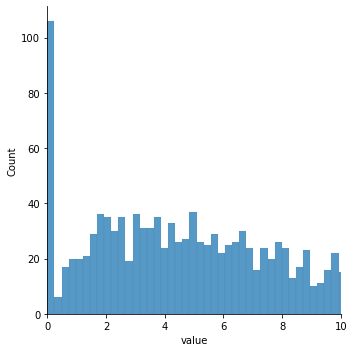

In [15]:
#we can also view the distribution condition of '25th percentile' of the 'Gas' value from '00:00 to 06:00'
st_check_2 = data.loc[(data['fuel']=='Gas') &
                      (data['summary_stat']=='25th percentile')&
                      (data['summary_time'].isin(st_check_1_time))]
sns.displot(data=st_check_2,x='value',bins=1000)
plt.xlim(0,10)
#from the results we can know that values close to '0' are relatively common from 00:00 to 06:00

#### 1.3.5 strange things summary

- Through analysis above, We have found that these 'strange things' are reasonable and therefore we do not need to modify them.

[Back to Contents](#Contents)

### 1.4 
### Summary of This Chapter

The dataset is from Smart Energy Research Lab(SERL<sup>1</sup>). It consists of summaries of the net electricity and gas consmpution data with linked contexual data, grouped by categorical variables(e.g. by region, by EPC rating<sup>2</sup>) or by banded conitinuous variables(e.g. temperature band<sup>3</sup>).

>[1]: SERL is a project aims to provide a secure and trusted channel for researchers to access high-resolution energy data. 
<br>[2]: EPC's full name is Energy Performance Certificate Rating, which rates the energy efficiency of the house and provides advice on improving energy efficiency.
<br>[3]: Temparture band will be divided into groups of every 5 degrees, we can view related information later.

Through analysis before, we have figured out the meaning of each column and some segmentation variables. We have also checked some 'strange things' which turned out to be reasonable.<br>

Using this data set, we can explore many areas of the energy consumption in GB. After dicussion with the data owner and the group members, the exploratory results of our group may serve the following 4 kinds of users:
   - Common users who are interested at the energy consumption information or pattern;
   - Researchers who aim to study the energy consumption in GB;
   - Energy Companies who want to keep track of energy consumption conditions and develop a market strategy;
   - Government who wants to do something to optimized the energy use and give some evidence for them to publish some policies.
 

[Back to Contents](#Contents)

## 2 Exploratory Questions

### 2.1 

### Question1 
#### Is there a difference in the trend in the distribution of household energy consumption in Scotland between 2020 and 2021? 

To answer this question, we can draw a graph compare the '2020 and 2021' values in Scotland.
We can use 'mean' value to compare, and use columns 'segmentation_variable_1','summary_time','summary_stat' to divide the dataset.

- Filter the required dataset

In [16]:
#To make our later filtering easier, I'm going to define a function to filter by entering the filter criteria
time_se = data['summary_time'].unique() #get all time related variables
#from the result in Chapter1 we can know these variable are listed in order

In [17]:
#we can define a function that helps split the variables
def time_classify(time_series,start,end): #series: the array; start: the starting point; end: the ending point
    t1 = np.where(time_series == start)#Find the index value of the element that equals 'start', as the starting point for splitting the array
    t2 = np.where(time_series == end)#Find the index value of the element that equals 'end', as the ending point for splitting the array
    splited_series = time_series[int(t1[0]):int(t2[0])+1]
    return splited_series

In [18]:
#classify different types of time variables
month_2021 = time_classify(time_se,'Jan-21','Dec-21')  #month in 2021
month_2020 = time_classify(time_se,'Jan-20','Dec-20') #month in 2020
seg_hour = time_classify(time_se,'00:30','00:00') #half an hour

In [19]:
#set the question1 filter condition
q1fcon_1 = data['segmentation_variable_1'] == 'Region' #select the segmentation variable
q1fcon_2 = data['segment_1_value'] == 'SCOTLAND' #select the region
q1fcon_3 = data['summary_time'].isin(month_2021)| data['summary_time'].isin(month_2020)#select the month data
q1fcon_4 = data['summary_stat'] == 'mean' #use 'mean' to compare
q1fcon_5 = data['summary_time'].isin(seg_hour) #select the 'half an hour'data

In [20]:
q1_fuel_m_data = data.loc[q1fcon_1 & q1fcon_2 & q1fcon_3 & q1fcon_4] # all fuel data divided by month in Scotland
q1_fuel_h_data = data.loc[q1fcon_1 & q1fcon_2 & q1fcon_5 & q1fcon_4]  # all fuel data divided by half an hour in Scotland

- simplify the dataframe

In [21]:
#Because the ‘time_period' has already illustrated the year, so we can simplify the column 'summary_time'
#e.g. 'Jan-21' to 'Jan'; 'Feb-20' to 'Feb'
new_time = q1_fuel_m_data['summary_time'].map(lambda x:x.strip('-012'))  #remove the string '-012' from the 'summary_time' column
#add a new column 'month'
q1_fuel_m_data.insert(loc=3, column='month', value=new_time) 

- draw the graph

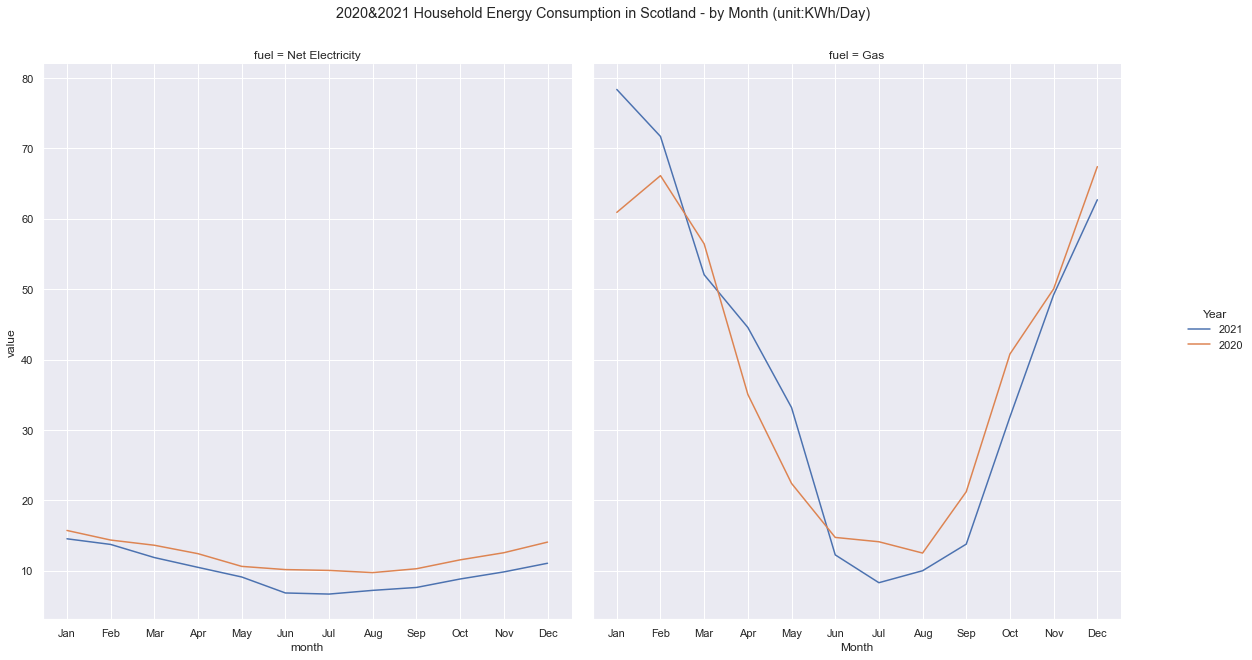

In [22]:
df1 = q1_fuel_m_data
sns.set() #set the background
sns.set_context('notebook')

ax1 = sns.relplot(data=df1,x='month',y='value',hue='time_period',col='fuel',kind="line",ci=None)
# set the graph style
ax1.figure.set_size_inches(18,10)
ax1.legend.set_title('Year')
plt.subplots_adjust(top=0.9) 
ax1.fig.suptitle('2020&2021 Household Energy Consumption in Scotland - by Month (unit:KWh/Day)')
plt.xlabel('Month')
plt.ylabel('KWh/Day')
sns.set_context({ 'legend.fontsize': 16 ,'legend.title_fontsize': 16})
plt.show()

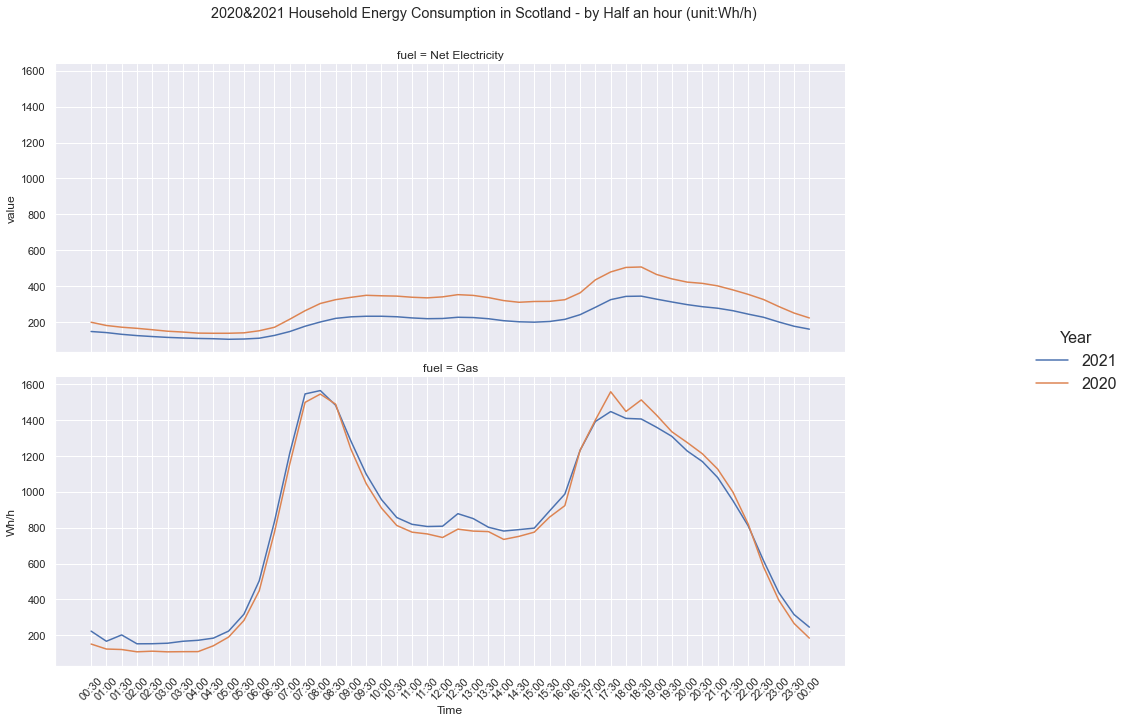

In [23]:
df2 = q1_fuel_h_data

ax2 = sns.relplot(data=df2,x='summary_time',y='value',hue='time_period',row='fuel',kind="line",ci=None)
# set the graph style
ax2.figure.set_size_inches(18,10)
ax2.legend.set_title('Year')
ax2.set_xticklabels(rotation = 45)
plt.subplots_adjust(top=0.9) 
ax2.fig.suptitle('2020&2021 Household Energy Consumption in Scotland - by Half an hour (unit:Wh/h)', x=0.5, y=0.98) 
plt.xlabel('Time')
plt.ylabel('Wh/h')
sns.set_context({'font.size':12,'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 16 ,'legend.title_fontsize': 16})
plt.show()

#### Answer


I think that the distribution trends show that domestic energy consumption in the Scottish region has been broadly similar over the last two years, with minor differences and some variation in energy use habits.

- Firstly we can look at the first graph, which shows the monthly distribution of domestic energy in the Scottish region.<br>
    - With regard to electricity use. In the last two years, 'May-September' are lower than the other months; Electricity use is higher in 2020 than in 2021 for the whole year, probably due to cooler temperatures in 2020 or people spending more time at home in 2020 due to 'lock down'.<br>
    - In terms of gas use, it is generally decreasing month by month from January to July until the lowest value, and then increasing month by month from August to December. It is worth noting that the peak in 2021 is in January, while the peak in 2020 is in February, and that overall the curve in 2021 also shifts a little to the left compared to 2020, possibly due to climate change and other factors that need to be investigated further.
    <br>
- Moving on to the second graph, this shows the distribution of domestic energy in Scotland by hour throughout the year.<br>
    - In terms of electricity use. In the last two years, electricity use has been higher between 9:00 and 21:00 hours of the day, with peaks occurring around 18:30. 2020 has higher electricity use at all times of the day than 2021.<br>
    - With regard to gas use. The last two years have shown a "double peak" for natural gas, with two peaks around 8:00 and 17:30. Natural gas use will be higher in 2021 than in 2020, except for the period 17:00-20:00.



[Back to Contents](#Contents)

### 2.2 

### Question 2
#### Is there any relationship between the variables in 2021: 'Gas Value', 'Num of Occupants', 'Temperature', 'Floor Area', 'Num of Bedrooms'; Will the conclusion of 'Electricity Value' is the same?

To answer this question, we can draw a heatmap to reflect the degree of relevance of these variables.
As for fuel value, we can use 'mean' value to compare. I plan to use data recorded in 2021 to compare, calculate \the correlation coefficient with function 'corr()',and then use a heatmap to illustrate.

- Filter the required dataset

In [24]:
#set the question2 filter condition
q2fcon_1 = data['summary_time']=='2021' #select the 2021 annual data
q2fcon_2 = data['summary_stat'] == 'mean' #use 'mean' to compare
q2fcon_3 = data['fuel']=='Gas'#select 'Gas' value
q2fcon_4 = data['fuel']=='Net Electricity'#select 'Electricity' value

In [25]:
#the desired gas value, select needed columns
q2_gas_y_data = data.loc[q2fcon_1 & q2fcon_2 & q2fcon_3,
                        ['value','mean_temp','mean_floor_area','mean_bedrooms','mean_occupants']] 
# mean Gas data in 2021, select the desired column of values
#rename the column
q2_gas_y_data = q2_gas_y_data.rename(columns={'value':'gas','mean_temp':'temperature','mean_floor_area':'floor area',
                              'mean_bedrooms':'bedroom num','mean_occupants':'occupant num'})

In [26]:
#the desired elec value
q2_ele_y_data = data.loc[q2fcon_1 & q2fcon_2 & q2fcon_4,
                        ['value','mean_temp','mean_floor_area','mean_bedrooms','mean_occupants']] 
#rename the column
q2_ele_y_data = q2_ele_y_data.rename(columns={'value':'electricity','mean_temp':'temperature','mean_floor_area':'floor area',
                              'mean_bedrooms':'bedroom num','mean_occupants':'occupant num'})

- Draw the Graph

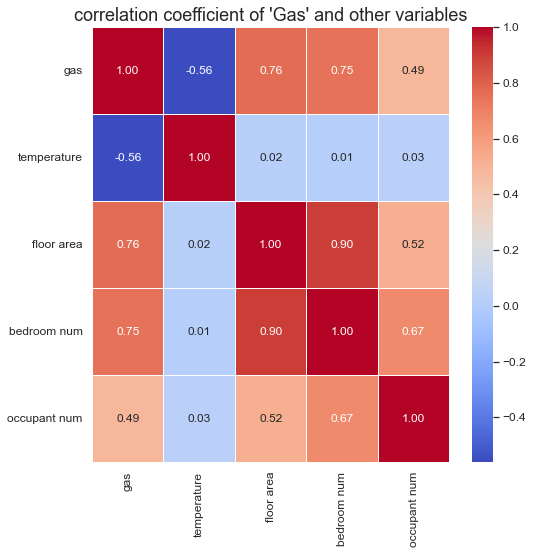

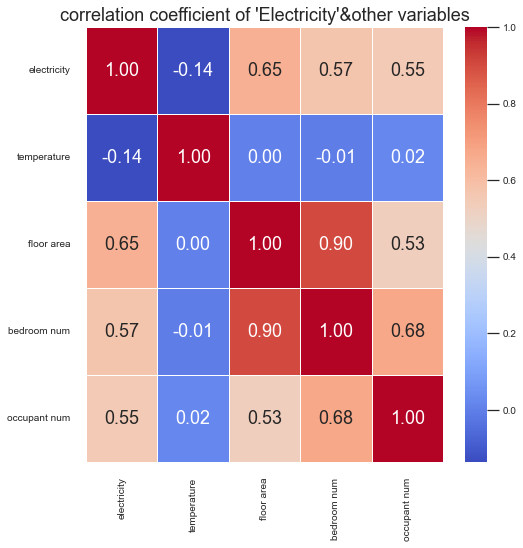

In [27]:
df3 = q2_gas_y_data.corr() #calculate the correlation coefficient corr()
#draw the graph
ax3 = sns.heatmap(df3,cmap='coolwarm',annot=True,fmt='.2f',linewidth=1.0)
ax3.figure.set_size_inches(8,8)
sns.set_context({'font.size': 18, 'axes.titlesize': 18.0, 'font.size': 18.0,'xtick.labelsize' : 10, 'ytick.labelsize': 10,
                 'xtick.major.size': 12.0, 'ytick.major.size': 12.0})
plt.title("correlation coefficient of 'Gas' and other variables")
plt.show()

df4 = q2_ele_y_data.corr() #calculate the correlation coefficient corr()
#draw the graph
ax4 = sns.heatmap(df4,cmap='coolwarm',annot=True,fmt='.2f',linewidth=1.0)
ax4.figure.set_size_inches(8,8)
sns.set_context({'font.size': 18, 'axes.titlesize': 18.0, 'font.size': 18.0,'xtick.labelsize' : 10, 'ytick.labelsize': 10,
                 'xtick.major.size': 12.0, 'ytick.major.size': 12.0})
plt.title("correlation coefficient of 'Electricity'&other variables")
plt.show()

#### Answer


From the result we can know the following information:
<br>

Both for 'Gas' and 'Electricity' graph, floor-area have the largest positive correlation coefficient. The second largest correlation coefficient is 'bedroom num' and then is the 'occupant num'. The 'temperature' has a minus correlation coefficient.The lower the temperature is, the higher the energy consumption is.<br>

However, the consumption of 'Electricity' is far less sensitive to the 'temperature' compared with 'Gas'.<br>

The correlation coefficient between 'floor area' and 'bedroom num' is 0.90, which is close to our daily impressions: 'Larger house usually has more bedrooms'. The relationship between 'floor area' and 'occupant num' is similar to this conclusion too.<br>

The correlation coefficient in values 'temperature','floor area','bedroom num','occupant num' is slightly different bewteen the 2 graph, this is because of the limitation of the data collection. The influence on the correlation coefficient is very little, reminding us that when we need to do some linear regression analysis, the slight different could be ignored.


[Back to Contents](#Contents)

### 2.3

### Question 3
#### For houses with electric heating device, what's the influence on their net electricity consumption in 2021?

To answer this question, we can also use a heatmap to reflect the monthly consumption of houses with different heating device in 2021.
As for 'net electricity' value, we can use 'mean' value to compare.

- Filter the required dataset

In [28]:
#set the question3 filter condition
q3fcon_1 = data['segmentation_variable_1'] == 'boiler_type_merge_for_elec_consumption' #select houses grouped by heating methods
q3fcon_2 = data['segment_1_value'] != 'None' #delete no data field
q3fcon_3 = data['summary_time'].isin(month_2021)#select the 2021 monthly data; 'month_2021' already defined in Question1
q3fcon_4 = data['summary_stat'] == 'mean' #use 'mean' to compare
q3fcon_5 = data['fuel']=='Net Electricity'#select 'Net Electricity' value

In [29]:
#the desired monthly elec value, select needed columns
q3_ele_m_data = data.loc[q3fcon_1 & q3fcon_2 & q3fcon_3 & q3fcon_4 & q3fcon_5,
                        ['value','summary_time','segment_1_value']] 
#Simplify the column 'summary_time' e.g. 'Jan-21' to 'Jan'; 
new_time_form = q3_ele_m_data ['summary_time'].map(lambda x:x.strip('-12'))  #remove the string '-012' from the 'summary_time' column
q3_ele_m_data['summary_time'] = new_time_form 

In [30]:
#rename the column
q3_ele_m_data = q3_ele_m_data.rename(columns={'value':'electricity','summary_time':'month','segment_1_value':'boiler_type'}) 
#use pivot to create new dateframe
q3_ele_m_data_new=q3_ele_m_data.pivot(index='boiler_type', columns='month', values='electricity') 
month_list = q3_ele_m_data['month'].unique() #get the list of every month
q3_ele_m_data_new= q3_ele_m_data_new.loc[:,month_list] #adjust the order of the columns

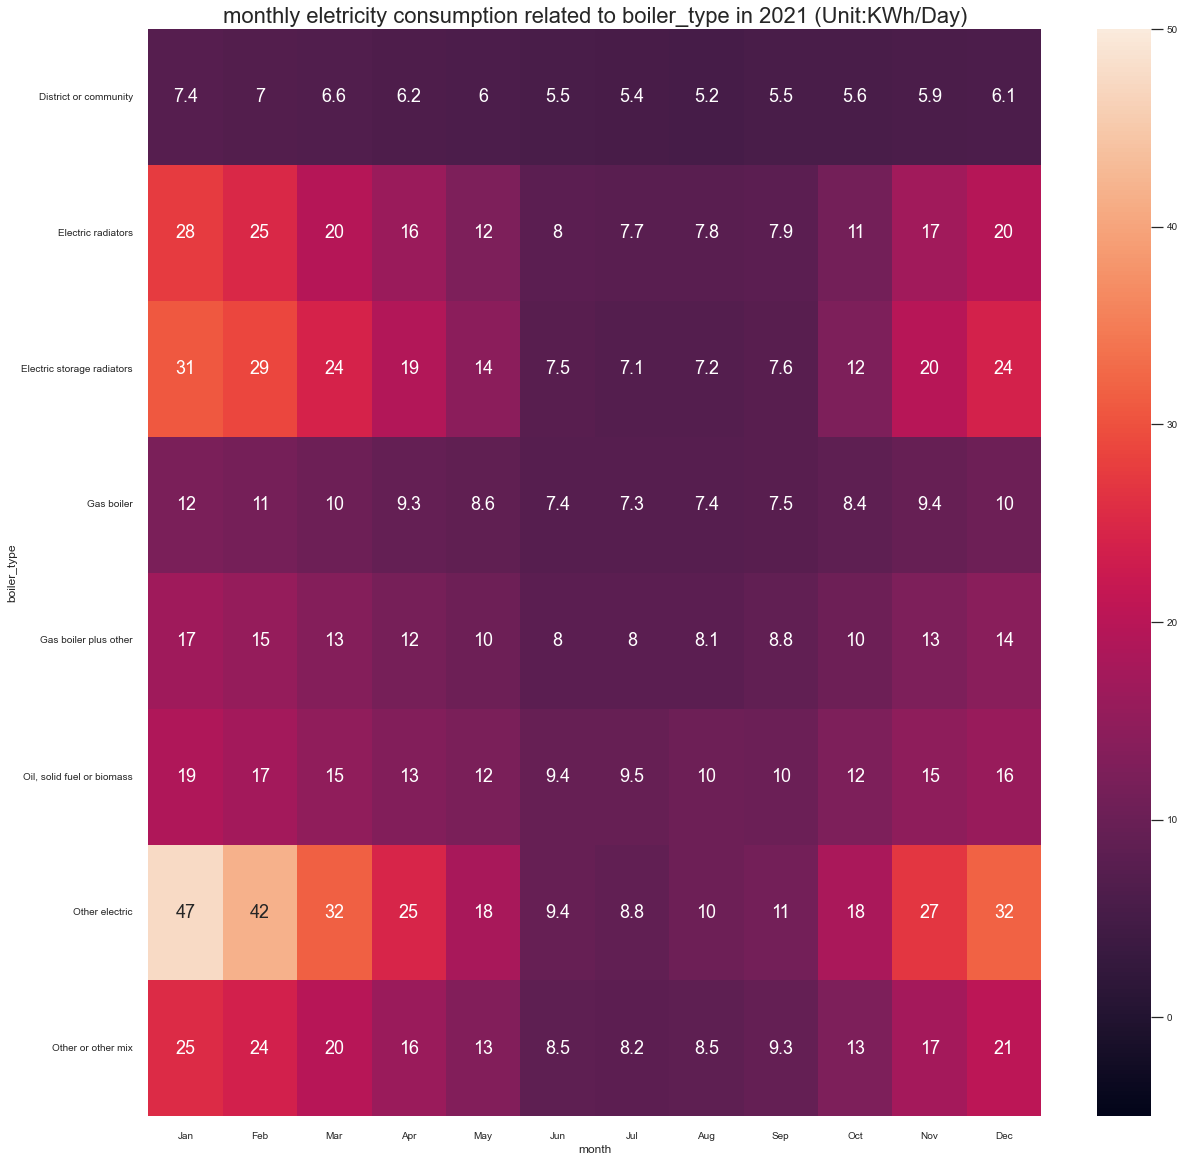

In [31]:
df5 = q3_ele_m_data_new
ax5 = sns.heatmap(q3_ele_m_data_new, annot=True,vmax=50, vmin=-5)
ax5.figure.set_size_inches(20,20)
sns.set_context({'font.size': 18, 'axes.titlesize': 22, 'font.size': 16.0,'xtick.labelsize' : 22, 'ytick.labelsize': 22,
                 'xtick.major.size': 15.0, 'ytick.major.size': 15.0})
plt.title("monthly eletricity consumption related to boiler_type in 2021 (Unit:KWh/Day)")
plt.show()

#### Answer


From the result we can know the following information:
<br>

Generally speaking, regardless of the type of boiler used, electricity consumption tends to decrease and then increase throughout the year, with the lowest values generally occurring between June and August and the highest values generally occurring in December and January.<br>

For households that do not use electric heating, although there is little fluctuation in electricity consumption over the year, there is still a general tendency to use more electricity in winter than in summer.<br>


For households that use only electric heating, the fluctuations in electricity consumption over the course of the year are very pronounced, with the highest electricity consumption for households using 'Electric Radiator', 'Electric storage Radiator' and 'Other Electric' being 4 times higher than the lowest. for households with 'Electric Radiator', 'Electric Storage Radiator', 'Other Electric', is four times or more than the lowest electricity consumption.<br>

For households using 'mix type', the variation is between the first two.<br>



[Back to Contents](#Contents)

## 3 Reflect and Hypothesis

### 3.1

### Hypothesis

#### 3.1.1 Hypothesis 1: 'Lock down policy', 'Rising energy prices', 'Environment Change' may be highly correlated to difference between 2020 and 2021 in Scotland. In other areas of GB, we may find similar phenomena.

Reason: <br>

From the 'electricity' graph in 2.1, we can see the difference of two curves are much bigger than that in the 'gas' graph. This indicates that people in Scotland consume more electricity at home last year. This difference is very obvious from 9:00 to 17;00, which should be the regular work time. So I think this phenomenon is related to some big social change. <br>

How to test:<br>

Firstly, we need to list all the variables that we think may have effect on the household energy consumption, such as 'floor area','building type','occupant numbers', etc. We can also use correlation analysis to explore whether other variables are highly related to the results. And then we should also search for some official data as reference. For example, the lockdown policy of different area in GB and the time period in which it takes effect. The changes in energy prices over a two-year period in GB.<br>

After that, we can try the method 'Multinomial logistic regression analysis' to have a regression result, from the result we can know the influence of each parameters on the value of energy consumption.<br>

We can also test the result for different areas in GB. Some of the influences may be different in different regions, for example the time of lock down may be different in different regions. If we find a correlation between the electricity curve and the time of lock down in different regions, then this supports the impact of lock down.<br>

In addition, we can also refer to the data befor 2019 and analyse the trends and values for each year and compare them with the current data.

#### 3.1.2 Hypothesis 2: Because most familes in GB prefer to heat with gas rather than electricity device,  that's why the correlation coffecient between 'Temperature' and 'Net Electricity' is so small.

Reason: <br>

Temperature change mainly influence people's mobility habits and heating needs. One the most common user of gas in houses is for heating, that's why gas value is so sensitive to the tempearture change(as shown in the graph in question 2). While the electricity can contain a very wide range of needs, such as powering household appliances. So I think families in GB perfer to heat with gas.

How to test:<br>

Firtsly we should try to exclude the influence of other variables, such as number of bedrooms. We can define a new parameter 'Electricity consumption per bedroom in a house' to reduce the impact of this variable on the results.<br>

We should also refer the 'boiler type' in different homes, which can be found in the dataset.<br>

We can also divide the results by area to see if all areas in GB have similar results.<br>

After that, we may ask the data owner to provide some previous research on heating preferences in UK households to support the conclusion.


#### 3.1.3 Hypothesis 3: The efficiency of using mere Electricity for heating may be better than using Gas or using Mix Energy for some residents.

Reason: <br>

When we look at the electricity consumption over the course of the year, households that use electricity for heating use around 30-40kwh more electricity in winter than in summer (as shown in the graph in question 3), and this extra electricity can be approximated as being used mainly for heating. And when we compare the change in gas consumption over the year (as shown in the graph in question 1), the difference between the very large and very small values comes to about 70 kwh. This means that but in terms of the amount of energy consumed, it seems to be less to use electricity for winter. However, this result may be influenced by other variables and therefore further testing is needed.


How to test:<br>

First of all we need to define the economy indicator and we need to ask the data owner if he has any information that the extra energy consumption in winter compared to summer is mainly for heating.<br>

I think the economy indicator consists of these varibles: the amount of energy used, the energy price, the number of bedrooms, the number of occupants, the external temperature. Some of these variables need us to check some external sources.<br>

We can define the calculation formula by ourselves or refer related paper. For example: economy_indicator = (energy price) \* (energy amount used for heating) / (bedroom_num) \* (occupant_num). And then we can calculate the results and do the comparison.<br>

In addition, we also have energy consumption data divided by 'whether users have PV device at home'. The net electricity value is also reduced when the user has a PV device. We should also take this into consideration.


[Back to Contents](#Contents)

### 3.2

### Reflect

#### Reflection on Data
This assignment has given me a more in-depth understanding of the dataset.
On the one hand, this is a very rich dataset, the data records are well standardised, preliminarily processed and sorted, all with a very high readability. There are a very large number of categorical variables in the dataset that allow the analysis of the domestic energy situation in different dimensions. There are also some very interesting variables, such as the presence of electric vehicles. In addition, the data from the project gave me insight into the energy situation in UK households and the energy use habits of different households, which was very rewarding.
On the other hand, there is a lack of data when we want to analyse issues such as the type of household appliances and the size of homes of users in specific areas, due to regulations and data collection restrictions. This would make me feel a bit sorry.

##### Thanks for reading.

[Back to Contents](#Contents)